In [3]:
# Importing necessary libraries
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
# Read in JPM dataset
jpm = read_csv(r'C:\Users\ungdu\Downloads\lab6_datamining_20521214\df_jpmorgan.csv', index_col=0, parse_dates=True)
# convert the daily data to quarterly data
jpm = jpm.resample(rule="Q").last()
jpm.head()

C:\Users\ungdu\AppData\Local\Temp\ipykernel_32228\2339178049.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  jpm = jpm.resample(rule="Q").last()


,Adj Close Price
Date,
1990-03-31,2.884144
1990-06-30,3.223591
1990-09-30,2.019471
1990-12-31,1.427535
1991-03-31,2.340254


In [6]:
# Fit an MA(1) model to the first simulated data
mod = ARIMA(jpm, order=(0,0,1))  # order is reversed for MA compared to AR, MA(1)
res = mod.fit()

In [7]:
# Print out summary information on the fit
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        Adj Close Price   No. Observations:                  120
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -502.271
Date:                Tue, 04 Jun 2024   AIC                           1010.543
Time:                        01:24:19   BIC                           1018.905
Sample:                    03-31-1990   HQIC                          1013.939
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2480      3.954      8.408      0.000      25.497      40.998
ma.L1          0.8927      0.040     22.555      0.000       0.815       0.970
sigma2       249.6415     35.514      7.029      0.0

In [8]:
# Print out the estimate for the coefficients
print(res.params)

const      33.247967
ma.L1       0.892672
sigma2    249.641471
dtype: float64


C:\Users\ungdu\AppData\Local\Temp\ipykernel_32228\681468815.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start='2025', periods=10, freq='Q')


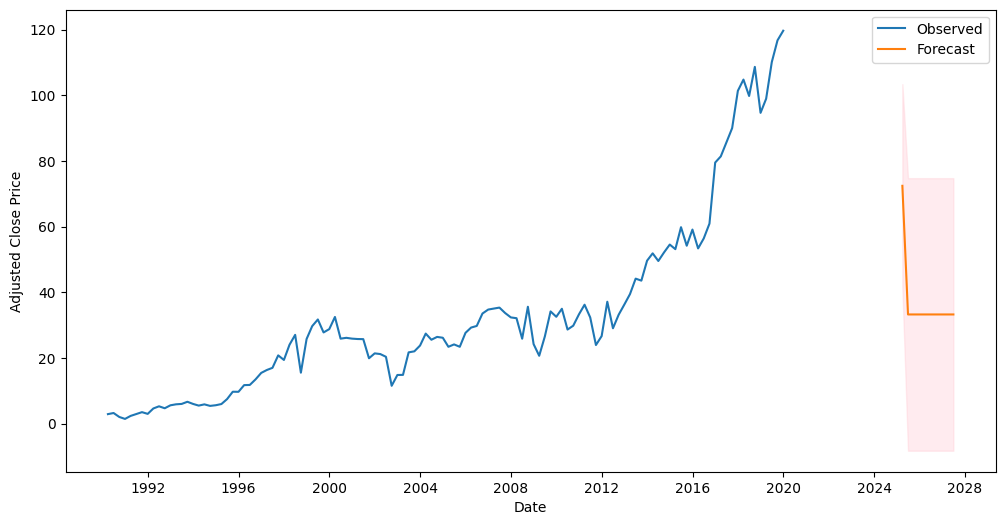

In [11]:
# Forecast Moving Average Model
mod = ARIMA(jpm, order=(0,0,1))
res = mod.fit()

# Start the forecast 10 data points before the end of the point series at,
# and end the forecast 10 data points after the end of the series at point
forecast = res.get_forecast(steps=10)
forecast_index = pd.date_range(start='2025', periods=10, freq='Q')

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(jpm.index, jpm, label='Observed')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()